 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [521]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [522]:
# Reading whale returns
whalecsv_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whalecsv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [523]:
# Count nulls

whale_returns.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [524]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [525]:
# Reading algorithmic returns
algocsv_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algocsv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [526]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [527]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [528]:
# Reading S&P TSX 60 Closing Prices
tsxcsv_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(tsxcsv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
sp_tsx_history = sp_tsx_history.sort_index()
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [529]:
# Check Data Types

sp_tsx_history.dtypes

Close    object
dtype: object

In [530]:
# Fix Data Types
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace(",", "")
sp_tsx_history["Close"]

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [531]:
sp_tsx_history.dtypes

Close    object
dtype: object

In [532]:
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")
sp_tsx_history.dtypes

Close    float64
dtype: object

In [533]:
# Calculate Daily Returns
Daily_Returns = sp_tsx_history.pct_change()
Daily_Returns.head()
Daily_Returns.dtypes

Close    float64
dtype: object

In [534]:
# Drop nulls
Daily_Returns.isnull().sum()

Close    1
dtype: int64

In [535]:
Daily_Returns = Daily_Returns.dropna()
Daily_Returns.head()
Daily_Returns.dtypes

Close    float64
dtype: object

In [536]:
# Rename `Close` Column to be specific to this portfolio.
Daily_Returns = Daily_Returns.rename(columns={"Close" : "TSX_change"})
Daily_Returns.head()

,TSX_change
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [537]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_Data = pd.concat([whale_returns, algo_returns, Daily_Returns], axis= "columns", join= "inner")
Combined_Data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_change
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

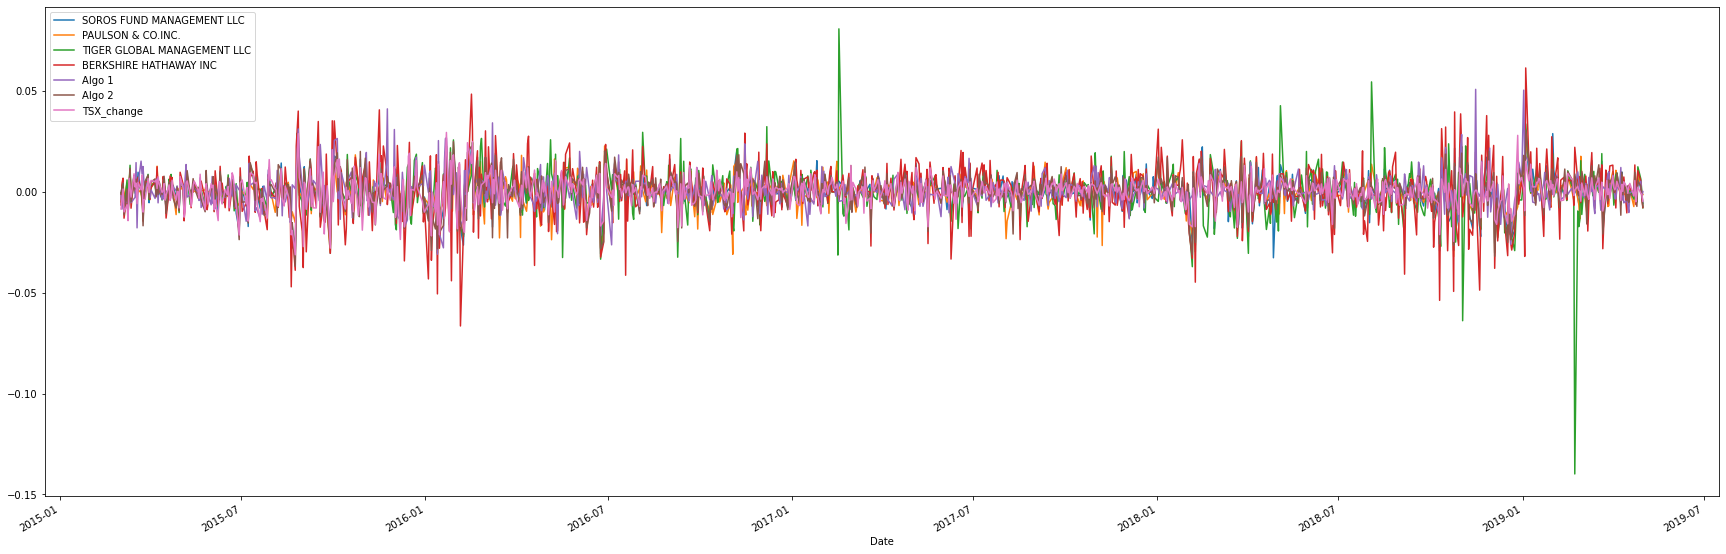

In [538]:
# Plot daily returns of all portfolios
Combined_Data.plot(figsize=(30,10))


#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000962           -0.001755   
2015-03-05                   0.004981            0.002314   
2015-03-06                  -0.002963           -0.001269   
2015-03-09                  -0.002383            0.002951   
...                               ...                 ...   
2019-04-25                   0.118163           -0.245179   
2019-04-26                   0.127275           -0.238264   
2019-04-29                   0.128689           -0.236192   
2019-04-30                   0.127228           -0.237881   
2019-05-01                   0.120637           -0.238904   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

<AxesSubplot:xlabel='Date'>

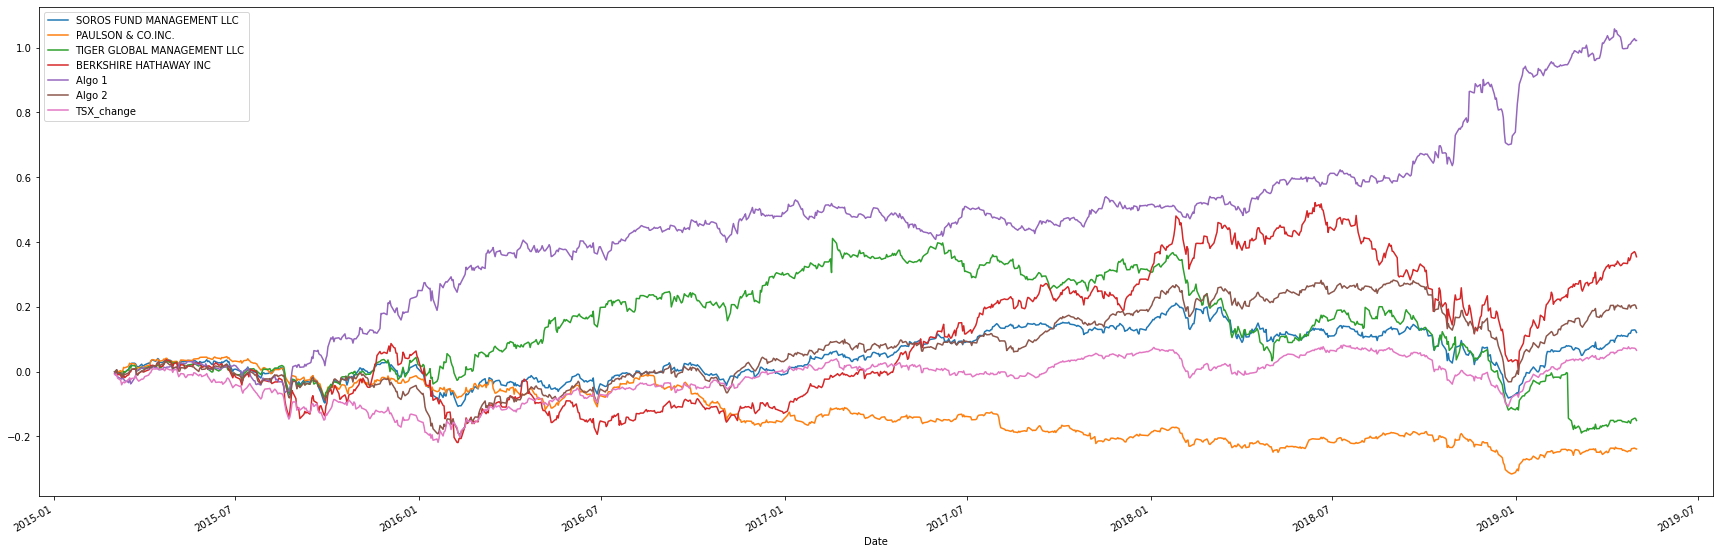

In [539]:
# Calculate cumulative returns of all portfolios
Cumulative_returns = (1+ Combined_Data).cumprod() -1
Cumulative_returns.dropna(inplace=True)
print(Cumulative_returns)

# Plot cumulative returns
Cumulative_returns.plot(figsize=(30,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

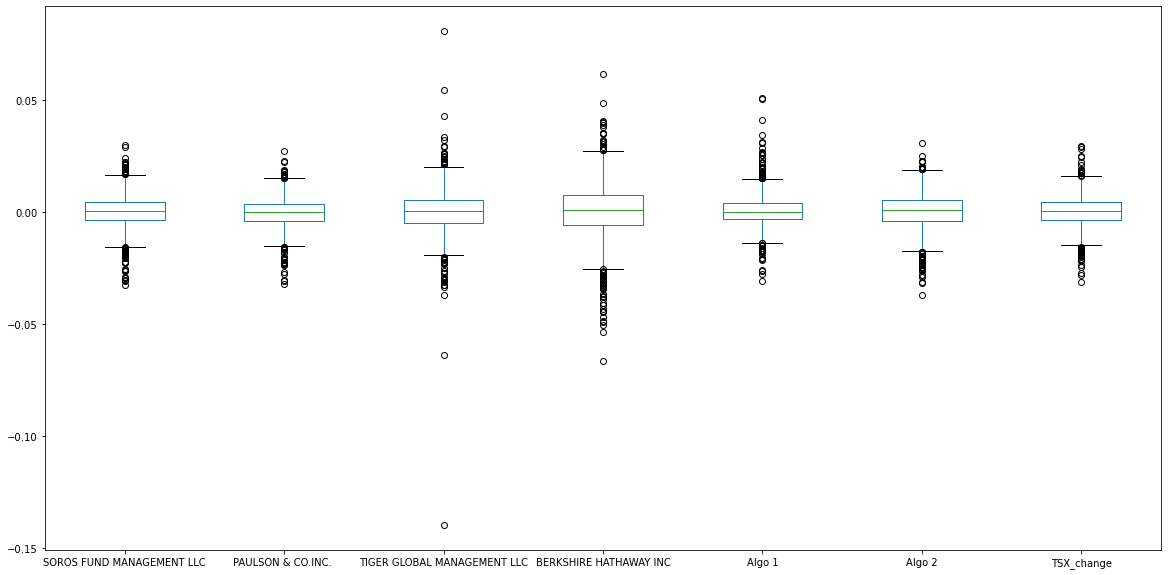

In [540]:
# Box plot to visually show risk
Combined_Data.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [541]:
# Calculate the daily standard deviations of all portfolios
Daily_STD= Combined_Data.std()
Daily_STD.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [542]:
# Calculate  the daily standard deviation of S&P TSX 60
Daily_STD_TSX = Daily_Returns.std()
Daily_STD_TSX.head

<bound method NDFrame.head of TSX_change    0.006637
dtype: float64>

In [543]:
# Determine which portfolios are riskier than the S&P TSX 60
# Berkshire Hathaway, TigerGlobal Management, Algo 2, Paulson & Co, Soros Funs Management are all riskier than the S&P TSX
Daily_STD = Daily_STD.sort_values(ascending=False)
Daily_STD.head(8)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
TSX_change                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [544]:

Daily_std_whale = whale_returns.std()
Daily_std_whale.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [545]:
Daily_std_algo = algo_returns.std()
Daily_std_algo.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Calculate the Annualized Standard Deviation

In [546]:
# Calculate the annualized standard deviation (252 trading days)
Annualized_std= Daily_STD * np.sqrt(252)
Annualized_std.head(8)


BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
TSX_change                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

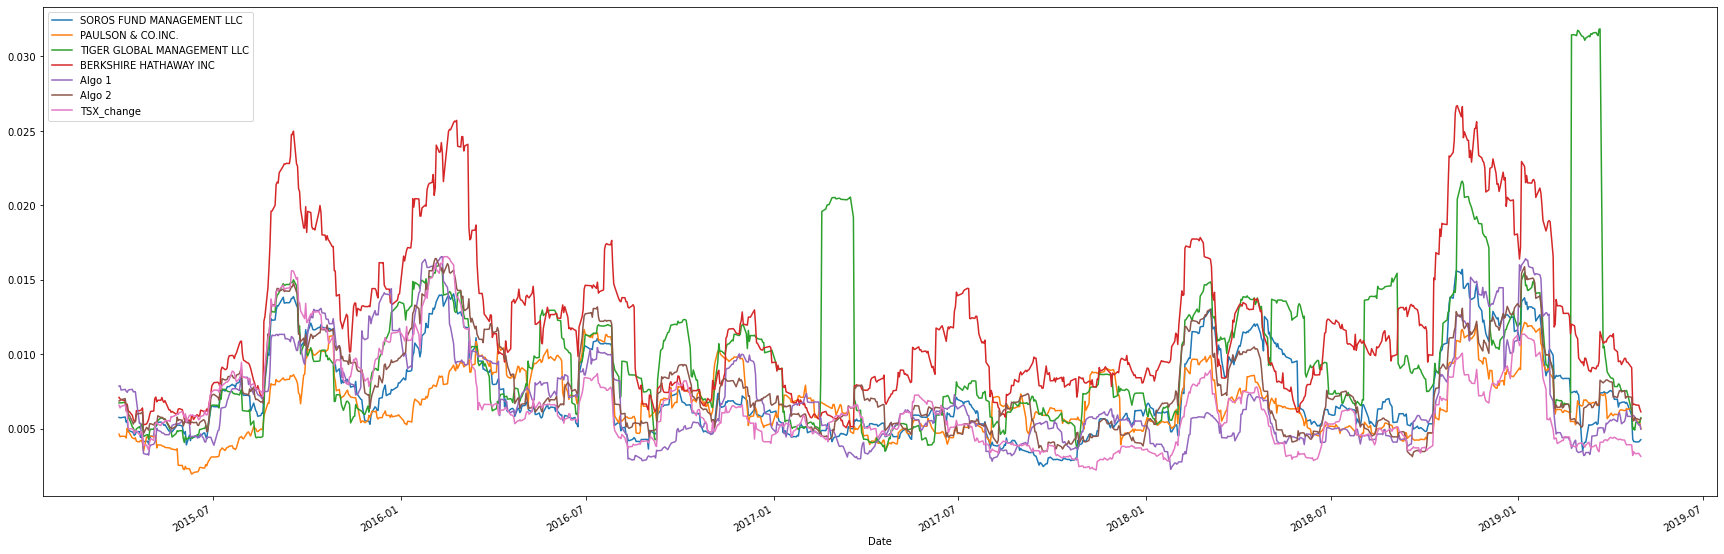

In [547]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_Combined_Data = Combined_Data.rolling(window=21).std()
Rolling_Combined_Data = Rolling_Combined_Data.dropna()
Rolling_Combined_Data.head()


# Plot the rolling standard deviation
Rolling_Combined_Data.plot(figsize=(30,10))

### Calculate and plot the correlation

<AxesSubplot:>

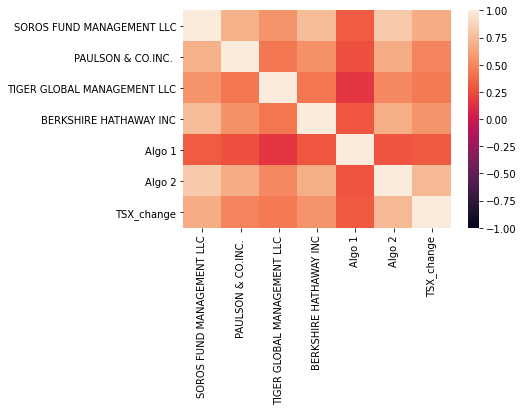

In [548]:
# Calculate the correlation
Correlation_combined_returns= Combined_Data.corr()
Correlation_combined_returns
# Display de correlation matrix
sns.heatmap(Correlation_combined_returns, vmin= -1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [549]:
# Calculate covariance of a single portfolio
covariance_algo1_TSX= Combined_Data['Algo 1'].rolling(window=60).cov(Combined_Data['TSX_change'])
covariance_algo1_TSX.dropna(inplace=True)
covariance_algo1_TSX

Date
2015-05-28    0.000010
2015-05-29    0.000009
2015-06-01    0.000008
2015-06-02    0.000009
2015-06-03    0.000007
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 970, dtype: float64

In [550]:

# Calculate variance of S&P TSX
variance_TSX= Combined_Data['TSX_change'].rolling(window=60).var()
variance_TSX.dropna(inplace=True)
variance_TSX

Date
2015-05-28    0.000032
2015-05-29    0.000032
2015-06-01    0.000032
2015-06-02    0.000032
2015-06-03    0.000030
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: TSX_change, Length: 970, dtype: float64

In [551]:
# Computing beta
Beta = covariance_algo1_TSX/variance_TSX
Beta.dropna(inplace=True)
Beta

Date
2015-05-28    0.295259
2015-05-29    0.296934
2015-06-01    0.265243
2015-06-02    0.273448
2015-06-03    0.244655
                ...   
2019-04-25    0.143726
2019-04-26    0.145294
2019-04-29    0.141913
2019-04-30    0.160629
2019-05-01    0.118788
Length: 970, dtype: float64

<AxesSubplot:xlabel='Date'>

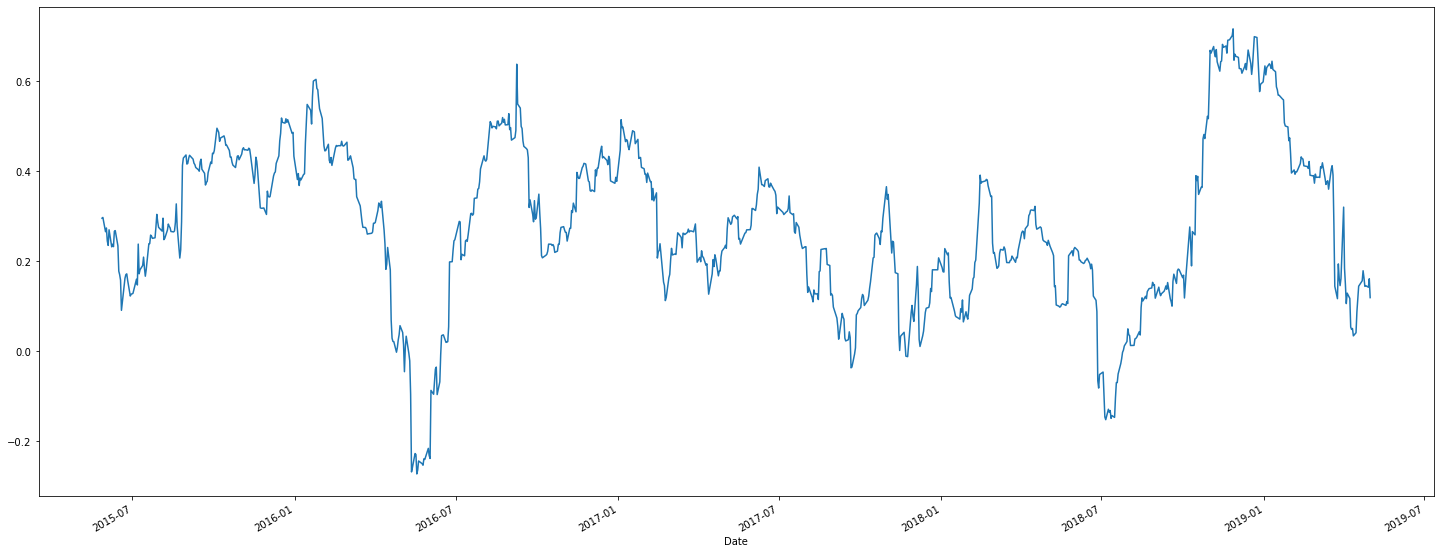

In [552]:
# Plot beta trend
Beta.plot(figsize=(25,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

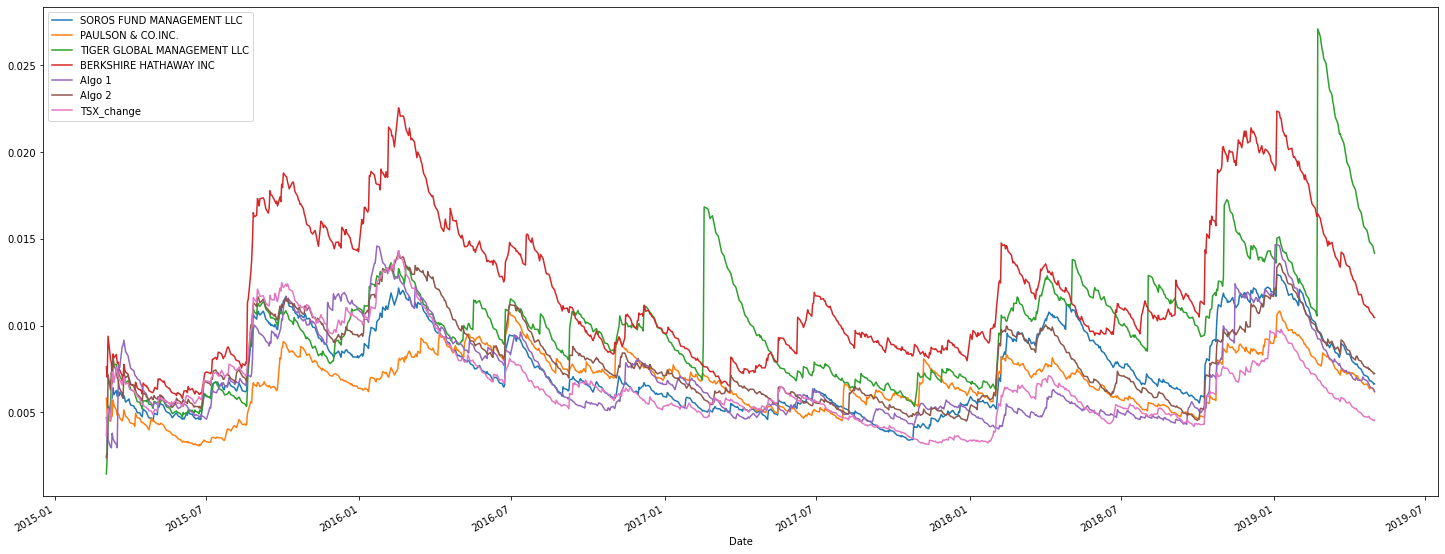

In [553]:
# Use `ewm` to calculate the rolling window
rollingmovingavg_Combined= Combined_Data.ewm(halflife=21).std()

rollingmovingavg_Combined.plot(figsize=(25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [554]:
# Annualized Sharpe Ratios
Ann_Sharpe_ratios = (Combined_Data.mean()*252) /Annualized_std
Ann_Sharpe_ratios = Ann_Sharpe_ratios.sort_values(ascending=False)
Ann_Sharpe_ratios.head(8)

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
TSX_change                     0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

In [555]:
#Sharpe_ratios = (Combined_Data.mean()) /Daily_STD
#Ann_Sharpe_ratios= (252**0.5) * Sharpe_ratios
#Ann_Sharpe_ratios = Ann_Sharpe_ratios.sort_values(ascending=False)
#Ann_Sharpe_ratios.head(8)

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

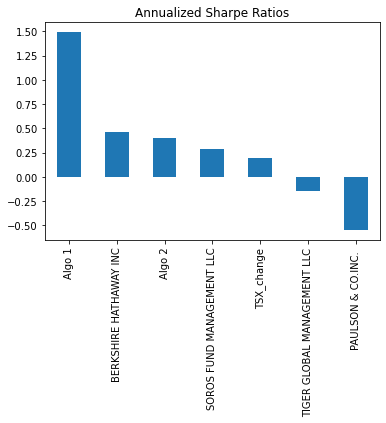

In [556]:
# Visualize the sharpe ratios as a bar plot
Ann_Sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic Strategies perfotmed better than the TSX and also better than most of the Whales portafolios so we can assume it is a better strategy

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [557]:
# Reading data from 1st stock
Otexcsv_path = Path("Resources/otex_historical.csv")
otex_returns = pd.read_csv(Otexcsv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
otex_returns = otex_returns.sort_index()
otex_returns=otex_returns.rename(columns= {"Close":"OTEX"})
otex_returns=otex_returns.drop(columns=["Symbol"])
otex_returns.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [558]:
# Reading data from 2nd stock
Lcsv_path = Path("Resources/l_historical.csv")
L_returns = pd.read_csv(Lcsv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
L_returns = L_returns.sort_index()
L_returns=L_returns.rename(columns= {"Close":"L"})
L_returns=L_returns.drop(columns=["Symbol"])
L_returns.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [559]:
# Reading data from 3rd stock
Shopcsv_path = Path("Resources/shop_historical.csv")
shop_returns = pd.read_csv(Shopcsv_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
shop_returns = shop_returns.sort_index()
shop_returns=shop_returns.rename(columns= {"Close":"SHOP"})
shop_returns=shop_returns.drop(columns=["Symbol"])
shop_returns.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [560]:
# Combine all stocks in a single DataFrame
New_Stocks = pd.concat([otex_returns, L_returns, shop_returns], axis= "columns", join= "inner")
New_Stocks.head()

,OTEX,L,SHOP
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51


In [561]:
# Reset Date index
New_Stocks.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=501, freq=None)

In [562]:
# Reorganize portfolio data by having a column per symbol
#Already Done

In [563]:
# Calculate daily returns
New_Stocks_daily=New_Stocks.pct_change()
# Drop NAs
New_Stocks_daily.dropna(inplace=True)
# Display sample data
New_Stocks_daily

,OTEX,L,SHOP
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254
...,...,...,...
2019-12-20,0.024441,0.003547,-0.005503
2019-12-23,-0.013463,-0.003240,-0.003118
2019-12-24,-0.007773,-0.000148,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [564]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
Weighted_returns= pd.DataFrame(New_Stocks_daily.dot(weights)).rename(columns ={0:"My Portfolio"})
# Display sample data
Weighted_returns.head()

,My Portfolio
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [565]:
# Join your returns DataFrame to the original returns DataFrame
Combined_Stocks = pd.concat([whale_returns, algo_returns, Daily_Returns, Weighted_returns], axis= "columns", join= "inner")
Combined_Stocks.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_change,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [566]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Combined_Stocks.dropna(inplace=True)
Combined_Stocks.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX_change,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [567]:
# Calculate the annualized `std`
Combined_Stocks_annualized_std= (Combined_Stocks.std()) * np.sqrt(252)
Combined_Stocks_annualized_std=Combined_Stocks_annualized_std.sort_values(ascending=False)
Combined_Stocks_annualized_std

BERKSHIRE HATHAWAY INC         0.227445
My Portfolio                   0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
TSX_change                     0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

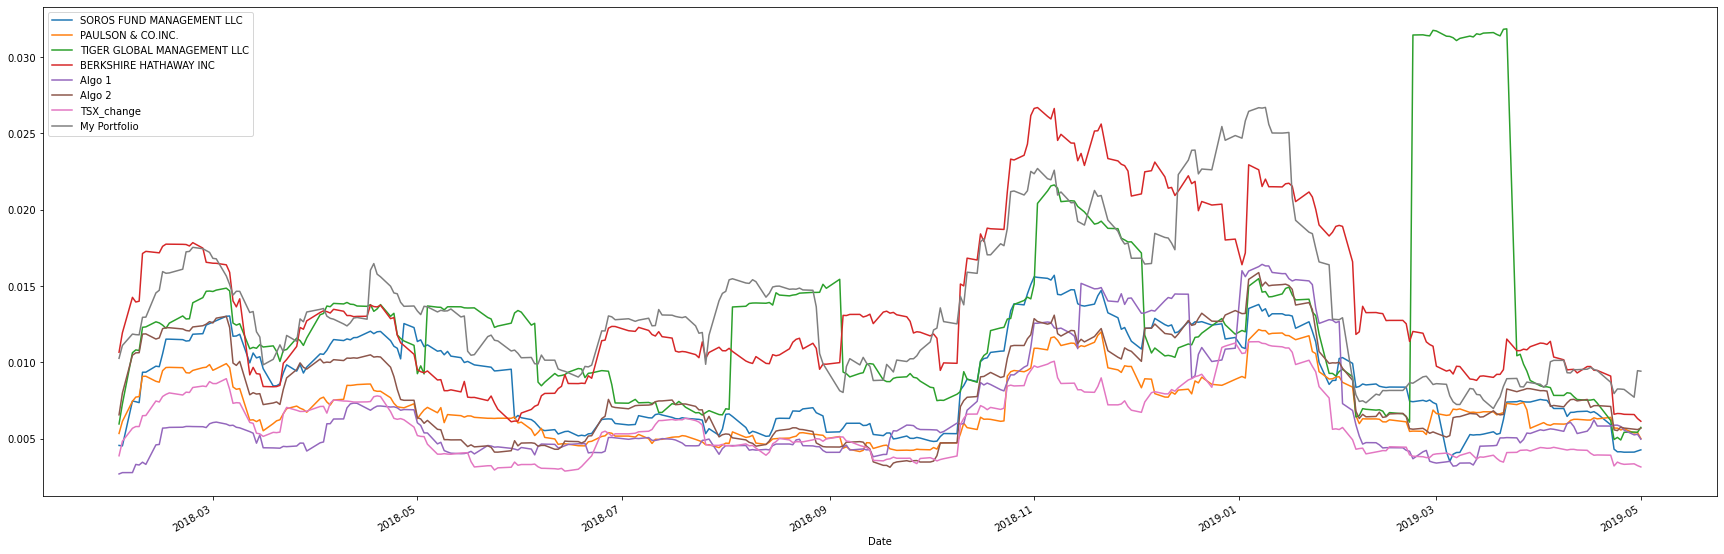

In [568]:
# Calculate rolling standard deviation
Rolling_Combined_Stocks = Combined_Stocks.rolling(window=21).std()
Rolling_Combined_Stocks = Rolling_Combined_Stocks.dropna()
Rolling_Combined_Stocks.head()


# Plot the rolling standard deviation
Rolling_Combined_Stocks.plot(figsize=(30,10))


### Calculate and plot the correlation

<AxesSubplot:>

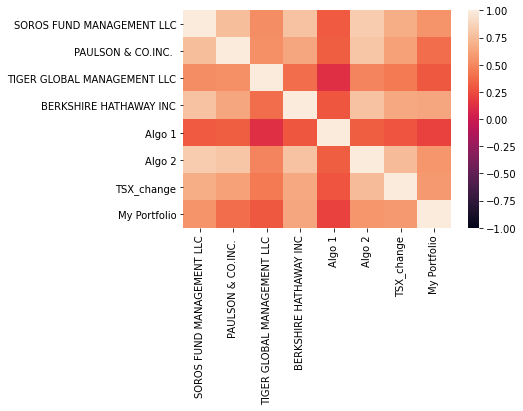

In [569]:
# Calculate and plot the correlation
Correlation_Combined_Stocks= Combined_Stocks.corr()
Correlation_Combined_Stocks

sns.heatmap(Correlation_Combined_Stocks, vmin= -1,vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [570]:
# Calculate and plot Beta
# Covariance
covariance_my_TSX = Combined_Stocks['My Portfolio'].rolling(window=60).cov(Combined_Stocks['TSX_change'])
covariance_my_TSX.dropna(inplace=True)
covariance_my_TSX

Date
2018-03-29    0.000052
2018-04-02    0.000055
2018-04-03    0.000055
2018-04-04    0.000055
2018-04-05    0.000054
                ...   
2019-04-25    0.000013
2019-04-26    0.000013
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000012
Length: 269, dtype: float64

<AxesSubplot:xlabel='Date'>

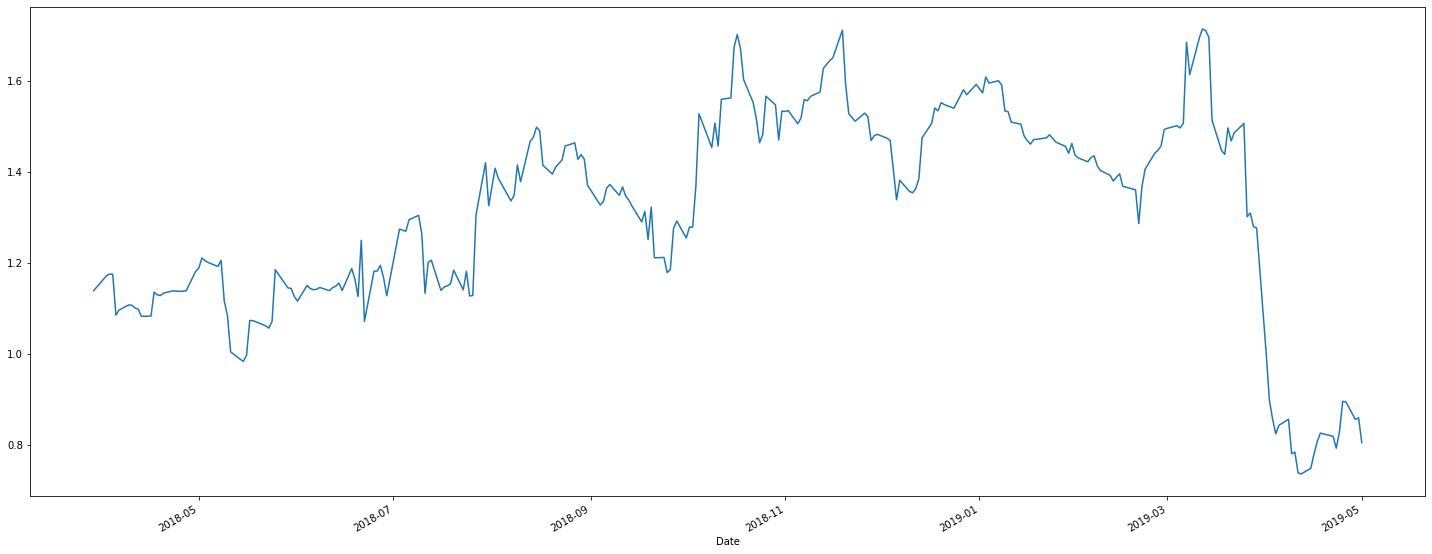

In [571]:
# Beta
Beta2 = covariance_my_TSX /variance_TSX
Beta2.dropna(inplace=True)
Beta2
Beta2.plot(figsize=(25,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [574]:
# Calculate Annualzied Sharpe Ratios
Sharpe_ratios_W_myportfolio = ((Combined_Stocks.mean()) * 252) / (Combined_Stocks.std() * np.sqrt(252))
Sharpe_ratios_W_myportfolio=Sharpe_ratios_W_myportfolio.sort_values(ascending=False)
Sharpe_ratios_W_myportfolio

Algo 1                         1.901461
My Portfolio                   1.564547
BERKSHIRE HATHAWAY INC         0.195907
TSX_change                     0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Including MY Portfolio'}>

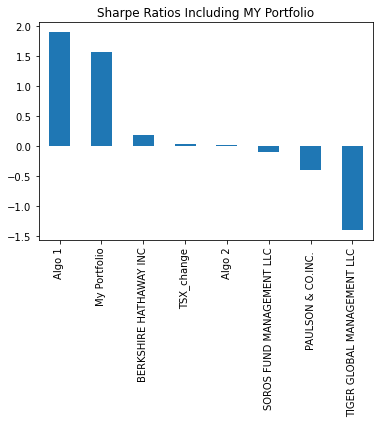

In [575]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios_W_myportfolio.plot(kind="bar", title="Sharpe Ratios Including MY Portfolio")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Almost as good as the Algorithmic1 portfolio, which is the best performing one based on its Sharpe ratio, but is also the second most volitile one based on its annualized standard deviation compared to the otehr ones.